# LOADING  LIBRARIES IN PYTHON

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
#from fancyimpute import KNN
from random import randrange, uniform
from scipy.stats import chi2_contingency
%matplotlib inline

In [ ]:
# SETTING THE WORKING DIRECTORY

In [3]:
#set working directory
os.chdir("D:\Project\Inputfiles")
os.getcwd()

'D:\\Project\\Inputfiles'

In [4]:
#Load training data
santander_data_train = pd.read_csv("train.csv",sep=",")

In [6]:
santander_data_train.head(5)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


# EXPLORATORY DATA ANALYSIS

In [7]:
santander_data_train.shape

(200000, 202)

# The Data contains the huge set of 200000 observations and 200 variables

In [6]:
santander_data_train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


# CHECKING THE MISSING VALUES IN THE DATASET

In [7]:
#Create dataframe with missing percentage for train dataset
missing_val_train = pd.DataFrame(santander_data_train.isnull().sum())

In [8]:
#Rename variable
missing_val = missing_val_train.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

In [9]:
#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(missing_val))*100

In [10]:
missing_val.head(5)

,Missing_percentage
ID_code,0.0
target,0.0
var_0,0.0
var_1,0.0
var_2,0.0


In [11]:
#save output results 
missing_val.to_csv("Missing_percentage.csv", index = False)

In [50]:
#store the copy of santander dataset into df variable 
#df = santander_data_train.copy()
santander_data_train = df.copy()

# CORRELATION ANALYSIS

In [6]:
#Storing all numeric values into one array 
numeric_data_var = ["var_0","var_1","var_2","var_3","var_4","var_5","var_6","var_7","var_8","var_9","var_10","var_11","var_12","var_13","var_14","var_15","var_16","var_17","var_18","var_19","var_20","var_21","var_22","var_23","var_24","var_25","var_26","var_27","var_28","var_29","var_30","var_31","var_32","var_33","var_34","var_35","var_36","var_37","var_38","var_39","var_40","var_41","var_42","var_43","var_44","var_45","var_46","var_47","var_48","var_49","var_50","var_51","var_52","var_53","var_54","var_55","var_56","var_57","var_58","var_59","var_60","var_61","var_62","var_63","var_64","var_65","var_66","var_67","var_68","var_69","var_70","var_71","var_72","var_73","var_74","var_75","var_76","var_77","var_78","var_79","var_80","var_81","var_82","var_83","var_84","var_85","var_86","var_87","var_88","var_89","var_90","var_91","var_92","var_93","var_94","var_95","var_96","var_97","var_98","var_99","var_100","var_101","var_102","var_103","var_104","var_105","var_106","var_107","var_108","var_109","var_110","var_111","var_112","var_113","var_114","var_115","var_116","var_117","var_118","var_119","var_120","var_121","var_122","var_123","var_124","var_125","var_126","var_127","var_128","var_129","var_130","var_131","var_132","var_133","var_134","var_135","var_136","var_137","var_138","var_139","var_140","var_141","var_142","var_143","var_144","var_145","var_146","var_147","var_148","var_149","var_150","var_151","var_152","var_153","var_154","var_155","var_156","var_157","var_158","var_159","var_160","var_161","var_162","var_163","var_164","var_165","var_166","var_167","var_168","var_169","var_170","var_171","var_172","var_173","var_174","var_175","var_176","var_177","var_178","var_179","var_180","var_181","var_182","var_183","var_184","var_185","var_186","var_187","var_188","var_189","var_190","var_191","var_192","var_193","var_194","var_195","var_196","var_197","var_198","var_199"]

In [9]:
##Correlation analysis
#Correlation plot
df_corr = santander_data_train.loc[:,numeric_data_var]

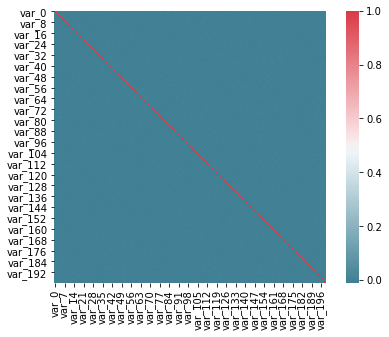

In [15]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

# As the Entire heat map is of blue color it infers that each variable is independent of one another and we need to include all the variables for the MODEL DEVELOPMENT

In [10]:
#Using PCA method for removing an extra variable
#IMPORT LIBRARY TO STANDARDIZE THE DATA
from sklearn.preprocessing import StandardScaler

In [11]:
test_fit = StandardScaler()
test_fit.fit(santander_data_train.iloc[:,2:202])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
santander_data = test_fit.transform(santander_data_train.iloc[:,2:202])

In [13]:
#IMPORTING THE PCA LIBRARY
from sklearn.decomposition import PCA
test_pca = PCA(n_components=100)

In [14]:
test_pca.fit(santander_data)
my_model = test_pca.transform(santander_data)

In [15]:
print(test_pca.explained_variance_ratio_.cumsum())

[0.00600303 0.01124513 0.01647656 0.02169854 0.02691794 0.03213476
 0.03734221 0.04254237 0.04773654 0.05292176 0.05810603 0.0632846
 0.06845561 0.07362256 0.07878123 0.08393764 0.08908956 0.09423606
 0.09938104 0.10452277 0.10965684 0.11478756 0.11991315 0.12503519
 0.13015519 0.13527071 0.14038472 0.14549548 0.15060152 0.15570272
 0.16080202 0.16589793 0.17099321 0.17608517 0.18117345 0.18625688
 0.19133562 0.19641036 0.20148117 0.20654819 0.21161347 0.21667475
 0.22173407 0.22678785 0.23183871 0.23688777 0.24193574 0.24698025
 0.25202017 0.25705624 0.26208681 0.26711364 0.27213686 0.27715756
 0.28217198 0.28718446 0.29219423 0.29719757 0.3022005  0.30720011
 0.31219738 0.31718743 0.32217634 0.32716318 0.33214492 0.33712206
 0.3420949  0.347066   0.35203495 0.35699806 0.36195945 0.36691486
 0.37186991 0.37681737 0.38176155 0.38670459 0.39164552 0.39658206
 0.40151338 0.40644014 0.41136538 0.41629046 0.4212087  0.42612263
 0.43103265 0.43594014 0.44084046 0.44573983 0.45063454 0.45552

From the above observation values we infer that only the variance covered by the 50% of the data is just 50% it shows that all the variables must be included to get the 100% variance

# DATA PREPROCESSING

MISSING VALUE ANALYSIS
#AS THERE ARE NO MISSING VALUES IN THE DATASET THERE IS NO NEED TO DO MISSING VALUE ANALYSIS.

# OUTLIERS

{'whiskers': [<matplotlib.lines.Line2D at 0x1be26536630>,
 'caps': [<matplotlib.lines.Line2D at 0x1be26536cf8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1be265364a8>],
 'medians': [<matplotlib.lines.Line2D at 0x1be265453c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1be26545710>],
 'means': []}

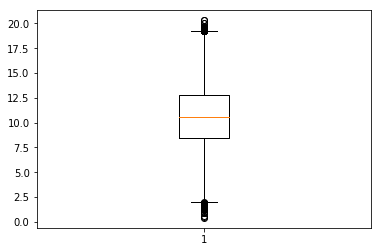

In [22]:
 #Plot boxplot to visualize Outliers
 %matplotlib inline  
 plt.boxplot(santander_data_train['var_0'])

THERE EXISTS THE OUTLIERS FOR THE DATA VARIABLES WE ARE REMOVING THE OUTLIERS WHICH ARE ABOVE 75th PERCENTILE AND BELOW 25th PERCENTILE

In [7]:
for i in numeric_data_var:
    q75,q25 = np.percentile(santander_data_train.loc[:,i],[75,25])
    print(i)
    iqr = q75 - q25
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print(min)
    print(max)
    santander_data_train = santander_data_train.drop(santander_data_train[santander_data_train.loc[:,i] < min].index)
    santander_data_train = santander_data_train.drop(santander_data_train[santander_data_train.loc[:,i] > max].index)

var_0
1.9973250000000018
19.214725
var_1
-13.888612499999997
10.507087499999999
var_2
3.031512499999998
18.207612500000003
var_3
0.6484500000000004
12.929649999999999
var_4
6.3163750000000025
15.827774999999997
var_5
-29.38955
19.11405
var_6
2.9145000000000008
7.856099999999998
var_7
6.206024999999997
26.839825000000005
var_8
-10.2005625
10.8209375
var_9
3.6705499999999995
11.53255
var_10
-15.5628
16.3516
var_11
-20.0544
13.399200000000002
var_12
13.488700000000001
14.569499999999998
var_13
-5.730549999999998
23.077849999999998
var_14
0.5459000000000014
14.504299999999999
var_15
13.345000000000002
15.792199999999998
var_16
2.048700000000002
16.4591
var_17
-24.981524999999998
13.696475
var_18
-8.5675
38.7573
var_19
-11.95475
36.660849999999996
var_20
-5.251424999999999
31.758375
var_21
-5.760100000000001
40.4015
var_22
-3.984325000000001
12.459875
var_23
1.4802499999999994
4.557450000000001
var_24
-1.1814875000000011
22.2772125
var_25
12.845600000000001
14.4744
var_26
-20.6719375
12.258

{'whiskers': [<matplotlib.lines.Line2D at 0x1be2658cd30>,
 'caps': [<matplotlib.lines.Line2D at 0x1be2659d438>,
 'boxes': [<matplotlib.lines.Line2D at 0x1be2658cbe0>],
 'medians': [<matplotlib.lines.Line2D at 0x1be2659dac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1be2659de10>],
 'means': []}

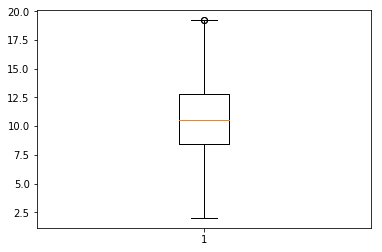

In [24]:
 #Plot boxplot to visualize Outliers
 %matplotlib inline  
 plt.boxplot(santander_data_train['var_0'])

ABOVE FIGURE SHOWS THAT THERE ARE NO OUTLIERS IN THE VAR_0

{'whiskers': [<matplotlib.lines.Line2D at 0x1be30237f60>,
 'caps': [<matplotlib.lines.Line2D at 0x1be2b3a8668>,
 'boxes': [<matplotlib.lines.Line2D at 0x1be30237e10>],
 'medians': [<matplotlib.lines.Line2D at 0x1be2b3a8cf8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1be2b39e080>],
 'means': []}

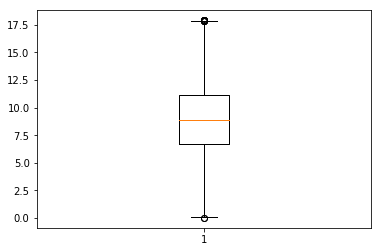

In [25]:
 #Plot boxplot to visualize Outliers
 %matplotlib inline  
 plt.boxplot(santander_data_train['var_186'])

# FEATURE SELECTION

In [26]:
santander_data_CORRELATION = santander_data_train.iloc[:,2:10]

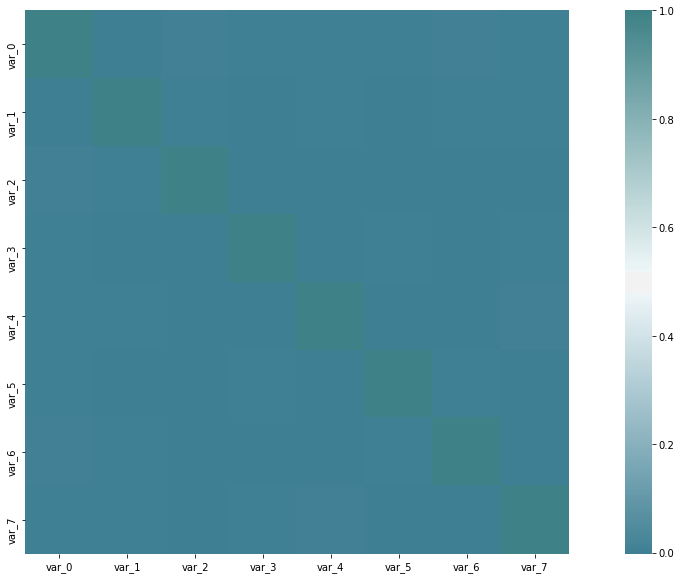

In [27]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(20, 10))

#Generate correlation matrix
correlation_matrix = santander_data_CORRELATION.corr()

#Plot using seaborn library
sns.heatmap(correlation_matrix, mask=np.zeros_like(correlation_matrix, dtype=np.bool), cmap=sns.diverging_palette(220, 200, as_cmap=True),
            square=True, ax=ax)

#FEATURE SCALING WILL BE DONE BASED ON THE MODEL

# MODEL DEVELOPMENT

# APPLYING A  LOGISTIC REGRESSION MODEL

In [28]:
#THIS VARIABLE IS OF STRING DATA TYPE AND IT HAS NO USE IN PREDICTING TARGET VALUE
santander_data_train = santander_data_train.drop("ID_code" , axis=1)

In [29]:
santander_data_train.shape

(175073, 201)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn import  metrics


x_train, x_test, y_train, y_test = train_test_split(santander_data_train.drop('target',axis=1), 
                                                    santander_data_train'] test_size=0.30, 
                                                    random_state=101)

In [31]:
x_train, x_test, y_train, y_test = train_test_split(santander_data_train.drop('target',axis=1), 
                                                    santander_data_train['target'] ,test_size=0.30, 
                                                    random_state=101)

In [32]:
#predicting the model
logistic_model = LogisticRegression()
logistic_model.fit(x_train,y_train)

E:\Datascience\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [33]:
logistic_predictions = logistic_model.predict(x_test)

In [34]:
# precision and recall for both the values are given
print(classification_report(y_test,logistic_predictions))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     47405
           1       0.69      0.26      0.38      5117

   micro avg       0.92      0.92      0.92     52522
   macro avg       0.81      0.63      0.67     52522
weighted avg       0.90      0.92      0.90     52522



In [35]:
# build confusion matrix
CM = confusion_matrix(y_test,logistic_predictions)
CM = pd.crosstab(y_test,logistic_predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#recall(y_test, y_pred)*100
print("recall", "=", (TP*100)/(TP+FN))

#precision
print("precision", "=" ,(TP*100)/(TP+FP))

#False Neagtive Rate
print("False Negative Rate", "=" ,(FN*100)/(FN+TP))

recall = 26.34356068008599
precision = 69.05737704918033
False Negative Rate = 73.65643931991401


In [36]:
metrics.roc_auc_score(y_test, logistic_predictions)

0.62534716739157

#Results
#Accuracy =92%
#recall = 26.34356068008599
#precision = 69.05737704918033
#AUC =62.53%
#False Negative Rate = 73.65643931991401

# APPLYING THE DECISION TREES CLASSIFIACTION ALGORITHM

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [38]:
decision_classifier = DecisionTreeClassifier(criterion="entropy")

In [39]:
decision_classifier.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [40]:
decision_predictions =decision_classifier.predict(x_test)

In [41]:
print(classification_report(y_test,decision_predictions))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     47405
           1       0.18      0.19      0.18      5117

   micro avg       0.84      0.84      0.84     52522
   macro avg       0.55      0.55      0.55     52522
weighted avg       0.84      0.84      0.84     52522



In [44]:
# build confusion matrix
CM = confusion_matrix(y_test,decision_predictions)
CM = pd.crosstab(y_test,decision_predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#recall(y_test, y_pred)*100
print("recall", "=", (TP*100)/(TP+FN))

#precision
print("precision", "=" ,(TP*100)/(TP+FP))

#False Neagtive Rate
print("False Negative Rate", "=" ,(FN*100)/(FN+TP))

recall = 18.6046511627907
precision = 18.27956989247312
False Negative Rate = 81.3953488372093


In [45]:
metrics.roc_auc_score(y_test,decision_predictions)

0.5481334762548352

# NAIVE BAYES

In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn import  metrics

In [12]:
#THIS VARIABLE IS OF STRING DATA TYPE AND IT HAS NO USE IN PREDICTING TARGET VALUE
santander_data_train = santander_data_train.drop("ID_code" , axis=1)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(santander_data_train.drop('target',axis=1), 
                                                    santander_data_train['target'] ,test_size=0.30, 
                                                    random_state=101)

In [14]:
#Naive bayes model 
NB_classifier = GaussianNB().fit(x_train,y_train)

In [15]:
#Predictions of testcases using  NaiveBayes
NB_predictor = NB_classifier.predict(x_test)

In [16]:
print(classification_report(y_test,NB_predictor))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96     47405
           1       0.72      0.36      0.48      5117

   micro avg       0.92      0.92      0.92     52522
   macro avg       0.83      0.67      0.72     52522
weighted avg       0.91      0.92      0.91     52522



In [18]:
# build confusion matrix
CM = confusion_matrix(y_test,NB_predictor)
CM = pd.crosstab(y_test,NB_predictor)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#recall(y_test, y_pred)*100
print("recall", "=", (TP*100)/(TP+FN))

#precision
print("precision", "=" ,(TP*100)/(TP+FP))

#False Neagtive Rate
print("False Negative Rate", "=" ,(FN*100)/(FN+TP))

recall = 35.86085597029509
precision = 72.04554377699255
False Negative Rate = 64.13914402970491


In [ ]:
#NAIVE BAYES RESULTS
#Accuracy = 92%
#recall =  35.86085597029509%
#precision =  72.04554377699255%
#AUC = 67.08%

# RANDOM FOREST CLASSIFIER

In [17]:
x_train, x_test, y_train, y_test = train_test_split(santander_data_train.drop('target',axis=1), 
                                                    santander_data_train['target'] ,test_size=0.30, 
                                                    random_state=101)

In [10]:
#THIS VARIABLE IS OF STRING DATA TYPE AND IT HAS NO USE IN PREDICTING TARGET VALUE
santander_data_train = santander_data_train.drop("ID_code" , axis=1)

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(x_train, y_train)

In [20]:
rf_predictions = rf_classifier.predict(x_test)

In [21]:
print(classification_report(y_test,rf_predictions))

In [23]:
# build confusion matrix
CM = confusion_matrix(y_test,rf_predictions)
CM = pd.crosstab(y_test,rf_predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#recall(y_test, y_pred)*100
print("recall", "=", (TP*100)/(TP+FN))

#precision
print("precision", "=" ,(TP*100)/(TP+FP))

#False Neagtive Rate
print("False Negative Rate", "=" ,(FN*100)/(FN+TP))

recall = 35.86085597029509
precision = 72.04554377699255
False Negative Rate = 64.13914402970491


In [24]:
metrics.roc_auc_score(y_test,NB_predictor)

0.6717945234966606

# SUMMARY

# PREDICT THE TEST DATA TARGET VALUE BY APPLYING THE SELECTED MODEL

In [19]:
santander_data_test = pd.read_csv("test.csv")


In [20]:
santander_data_test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [21]:
id_code = santander_data_test.iloc[:,0]

In [22]:
#REMOVE ID_code column as it is string datatype and has no use in model predictions.
santander_data_test = santander_data_test.drop("ID_code" ,axis=1)

# PREDICTING FROM TEST DATASET

In [23]:
test_predictions = NB_classifier.predict(santander_data_test)

In [24]:
prediction_data = pd.DataFrame({"ID_code" :id_code ,"target": test_predictions})
prediction_data.head()

,ID_code,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0


In [25]:
#joining id and target column into the test data set
santander_data_test = prediction_data.join(santander_data_test)

In [26]:
santander_data_test.shape

(200000, 202)

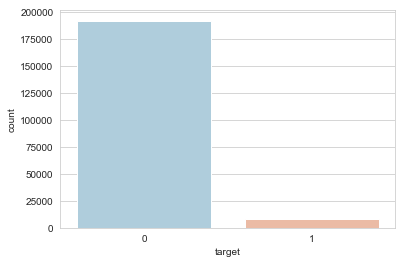

In [27]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=santander_data_test,palette='RdBu_r')

In [28]:
santander_data_test["target"].value_counts()

0    192096
1      7904
Name: target, dtype: int64

# CONVERT THE VALUE OF TARGET VARIABLE AS "make transaction" for value "1" and "not make transaction" for value "0"

In [29]:
santander_data_test["target"] = santander_data_test["target"].apply( lambda x: "make transaction" if x==1 else "not make transaction")

In [30]:
santander_data_test.head(5)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,not make transaction,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,not make transaction,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,not make transaction,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,not make transaction,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,not make transaction,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


EXPORT THE FINAL PREDICTION VALUES INTO A FILE "final_predictions.csv"

In [31]:
santander_data_test.to_csv("santander_test_result_final.csv")

********************************************************END********************************************************************